# Procesamiento de imagenes morfológicas
La morfología matemática es el área del procesamiento de imagágenes que se usa para representar, describir, y analizar formas en imagénes.

El principio básico de la morfoología matemática es obtener/extraer información geométrica o topoloógica de una imágen, a traves de transformaciones, utilizando elementos estructurales.

Para eso, trabajaremos con imagenes binarias, es decir, toma valores de: 0,1 (normalizado), 0,255 (8-bit)

    Los valores pueden no ser exactamente 0 ó 1, debido a la compresión
    


In [1]:
clc;clear;
function Y = binaria(X)
    Y = zeros(size(X));
    ind_blanco = (X>= 0.5);
    %ind_negro = (X < 0.5); % No hace falta
    Y(ind_blanco) = 1;
    %Y(ind_negro) = 0; %=> No hace falta, ya que la matriz original es una matriz de ceros
endfunction

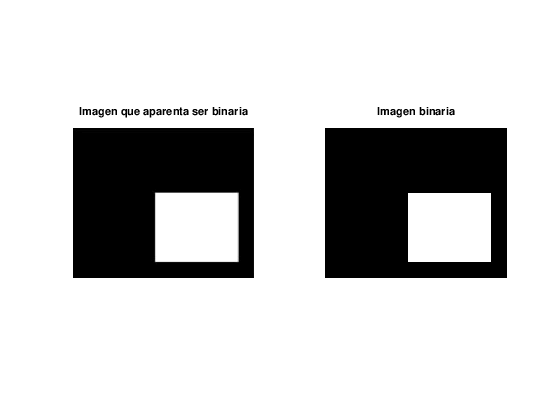

In [29]:
pkg load image
A = imread('Images/imagen2.jpg');
subplot(1,2,1);
imshow(A);
title("Imagen que aparenta ser binaria")

subplot(1,2,2);
A = im2double(A);
B =binaria(A);
imshow(B);
title("Imagen binaria")

## Conceptos fundamentales
Sea $A$ una imagen binaria, Sea $z = (x,y) \in A$, donde $(x,y)$ representa la posicion de un pixel en la imagen A

### Operaciones
1. **Complemento de $A$**: $A^c=\{(x,y)/(x,y) \not\in A\}$
1. **Unión de $A$ y $B$:** $A\cup B = \{(x,y)/(x,y) \in A \vee  (x,y) \in B\}$
1. **Intersección de $A$ y $B$:** $A\cap B = \{(x,y)/(x,y) \in A \wedge  (x,y) \in B\}$
1. **Diferencia de $A$ y $B$:** $A-B = \{ (x,y)/(x,y) \in A \wedge (x,y) \not \in B \}$
1. **Traslación de A por un punto $w=(\bar x, \bar y)$:**$A_w = \{ c= (x,y)/c=z+w, z\in A \}$
1. **Reflexión:** Es el conjunto relacionado al origen de un sistema de coorddenadas y se define como: $\hat A = \{ z=(x,y)/z=-a, a\in A \}$

#### ¿Cómo hacer las operaciones anteriores en Octave?

|**Operación**|**GNU Octave**|
|-|-|
|$A\cap B$|A & B|
|$A\cup B$|A \| B|
|$A^c$ | ~A|
|$A - B$|A &~ B|

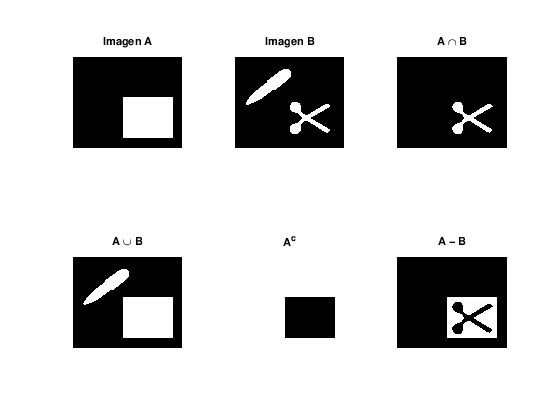

In [47]:
pkg load image
A = imread('Images/imagen2.jpg');
subplot(2,3,1);
A = im2double(A);
A =binaria(A);
imshow(A);
title('Imagen A')

B = imread('Images/imagen3.jpg');
subplot(2,3,2);
B = im2double(B);
B =binaria(B);
imshow(B);
title('Imagen B')

% Intersección
O1 = A&B;
subplot(2,3,3);
imshow(O1);
title('A \cap B')

% Union
O2 = A|B;
subplot(2,3,4);
imshow(O2);
title('A \cup B')

% Complemento
O3 = ~A;
subplot(2,3,5);
imshow(O3);
title('A^c')

% Diferencia
O4 = A&~B;
subplot(2,3,6);
imshow(O4);
title('A - B')

## Operación de Dilatación
Es una operación que hace crecer o engrosar un objeto en una imagen.

Matemáticamente, la dilatación de A y B se denota $A\oplus B$ y se defina como el conjunto 
$$A \oplus B= \{ z=(x,y)/(\hat B)_z \cap A \not = \not O \}$$

donde B es una matriz simétrica.

Para definir esta operación de una menera más intuitiva, definiremos el centro de una imagen.

* **Origen o centro:** Sea $B \in {\rm I\!R}^{m\times n}$, entonces el centro/origen de B se define como el par ordenado
$$ (\bar x, \bar y) = \left( \left[\frac{m+1}{2}\right], \left[\frac{n+1}{2}\right] \right) $$
donde $[w]$ es truncar el valor de $w$.

**Ejemplo:** Sea $B \in {\rm I\!R}^{2\times 2}$, entonces
$$ (\bar x, \bar y) = \left( \left[\frac{2+1}{2}\right], \left[\frac{2+1}{2}\right] \right) = ([1.5], [1.5]) = (1,1)$$

El proceso de dilatación se puede obtener de la siguiente forma:

Para cada pixel en $A$, que tenga el valor de 1, se superpone la matriz $B$ en el centro y todos los pixeles que abarque la matriz $B$ toman el valor de 1.

**Ejm: Considere las matrices:**

$$
\begin{matrix}
A = 
\left(
\begin{matrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 
\end{matrix}
\right)_{5 \times 5}
&
B =
\left(
\begin{matrix}
1 & 1 \\ 
1 & 1
\end{matrix}
\right)_{2 \times 2} \\
&\\
A \oplus B= 
\left(
\begin{matrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 1 & \color{red} 1 & 0 \\
0 & 1 & 1 & \color{red} 1 & 0 \\
0 & \color{red} 1 & 1 & \color{red} 1 & 0 \\
0 & 0 & \color{red} 1 & \color{red} 1 & 0 
\end{matrix}
\right)_{5 \times 5} & \Longrightarrow \text{Resultado de dilatación}
\end{matrix}
$$

    Nota: 
    1. La matriz $B$ se conoce como elementos estructurado \color{red} 1$(EE)$, el cual se recomienda que sea simétrico.
    2. Para generar EE, se puede usar los comandos zeros, ones, strl en Octave.

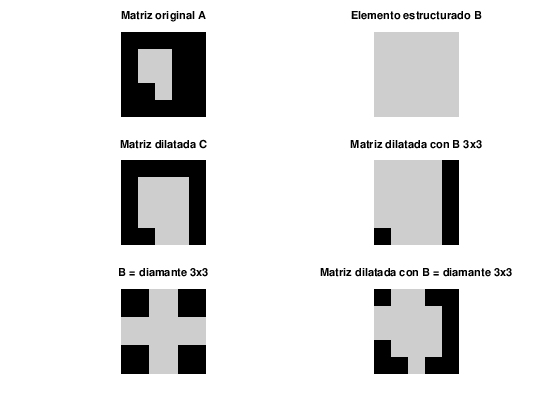

In [32]:
% Ejemplo -c3
pkg load image;

A = [0 0 0 0 0;
     0 1 1 0 0;
     0 1 1 0 0;
     0 0 1 0 0;
     0 0 0 0 0 ];
B = [1 1;
     1 1];
C = imdilate(A, B);

subplot(3,2,1);
imshow(A*0.8);
title('Matriz original A')


subplot(3,2,2);
imshow(B*0.8)
title('Elemento estructurado B')

subplot(3,2,3);
imshow(C*0.8);
title('Matriz dilatada C')

subplot(3,2,4);
B = ones(3);
C = imdilate(A, B);
imshow(C*0.8);
title('Matriz dilatada con B 3x3')

subplot(3,2,5);
B = getnhood(strel('diamond', 1));
imshow(B*0.8)
title('B = diamante 3x3')

subplot(3,2,6);
C = imdilate(A, B);
imshow(C*0.8);
title('Matriz dilatada con B = diamante 3x3')

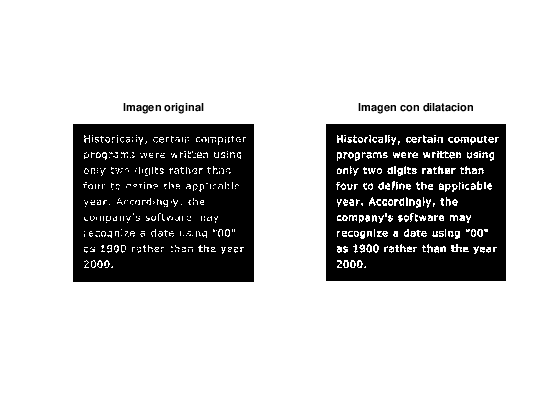

In [42]:
pkg load image
A = imread('Images/imagen1.jpg');
A = im2double(A);
A = binaria(A);
subplot(1,2,1);
imshow(A)
title('Imagen original');

%B = [1 0 1;
%     0 1 0;
%     1 0 1];
B = strel('diamond', 1);
C = imdilate(A,B);
subplot(1,2,2);
imshow(C)
title('Imagen con dilatacion');


## Erosión
Es una operación morfológica cuyo objetivo es encoger o adelgazar los objetos de una imagen binaria.

Matemáticamente, la erosión de A y B se denota $A \ominus B $ y se define como:
$$
A\ominus B = \{ z = (x,y) / (\hat B)_z \cup A^c \not = \phi \}
$$

La erosión se puede interpretar de la siguiente manera: SEa $A$ una imagen binaria y $B$ un elemento estructurado.

1. Considere solo las entradas de $A$ cuyo valor es 1.
1. "Superponemos" la matriz $B$ encima de cada una de las entradas iguales a 1, considerando el origen de $B$.
1. Si la matriz $B$ calza exactamente en el bloque que se superpuso, entonces ponemos 1 en ese valor, en caso contrario, se pone 0.

**Ejem:** Considere las matrices

$$
\begin{matrix}
A = 
\left(
\begin{matrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 1 \\
0 & 0 & 0 & 0 & 0 
\end{matrix}
\right)_{5 \times 5}
&
B =
\left(
\begin{matrix}
1 & 1 \\ 
1 & 1
\end{matrix}
\right)_{2 \times 2} \\
&\\
A \ominus B= 
\left(
\begin{matrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & \color{red} 0 & \color{red} 0 & 0 \\
\color{red} 0 & 1 & \color{red} 0 & 0 & 0 \\
0 & \color{red} 0 & \color{red} 0 & \color{red} 0 & \color{red} 0 \\
0 & 0 & 0 & 0 & 0 
\end{matrix}
\right)_{5 \times 5} & \Longrightarrow \text{Resultado de erosión}
\end{matrix}
$$

**Nota:** La dilatación y erosión se pueden interpretar de la siguente forma:
Sea $G$ y $F$ imágenes binarias, donde $F$ es un elemento estructurado.
Entonces:
$$
\begin{matrix}
(G \oplus F)(x,y) &=& \left\{
\begin{matrix} 
1 & \text{si} & F &\text{"toca"}&G\\
0 & \text(si) & F &\text{"no toca"} &G
\end{matrix}
\right. \\
(G \ominus F)(x,y) &=& \left\{
\begin{matrix} 
1 & \text{si} & F &\text{"calza" en}&G\\
0 & \text(si) & F &\text{"no calza" en} &G
\end{matrix}
\right. \\
\end{matrix}
$$

B =

   1   1
   1   1



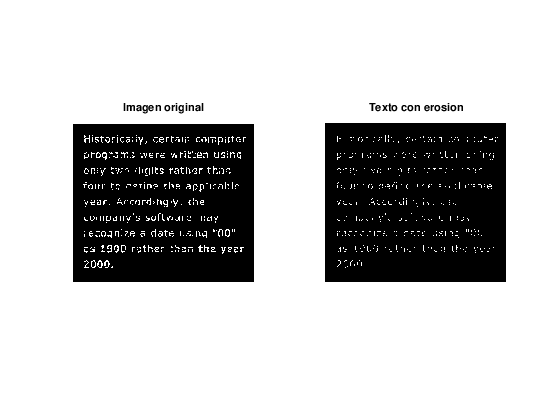

In [46]:
% Ejemplo 5
pkg load image
A = imread('Images/imagen1.jpg');
A = im2double(A);
A = binaria(A);
subplot(1,2,1);
imshow(A)
title('Imagen original');

%B = [1 0 1;
%     0 1 0;
%     1 0 1];
%B = strel('diamond', 1);
B = ones(2)
C = imerode(A,B);
subplot(1,2,2);
imshow(C)
title('Texto con erosion');


## Operadores de Apertura y Clausura
**Apertura:** La apertura morfológica de $A$ por $B$ se representa como:
$$
A \odot B = (A\ominus B) \oplus B
$$

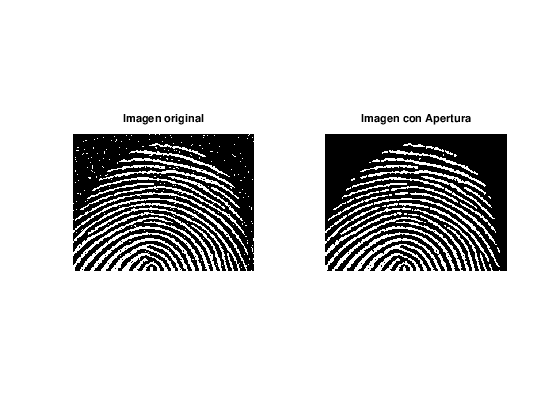

In [51]:
pkg load image
A = imread('Images/imagen5.jpg');
A = im2double(A);
A = binaria(A);

subplot(1,2,1);
imshow(A);
title('Imagen original')

% Elemento estructurado
B = strel('diamond', 1);

%Apertura morfológica de A por B
%C1 = imerode(A, B);
%C = imdilate(C1, B);
C = imopen(A, B);

subplot(1,2,2);
imshow(C);
title('Imagen con Apertura')

## Algoritmos morfológicos
### Extracción de bordes / fronteras, Sea B un EE
1. **Borde interno:** $B_I(A) = A-(A\ominus B)$
1. **Borde externo:** $B_E(A) = (A\oplus B) - A$
1. **Gradiente morfológico:** $B_M(A) = (A\oplus B) - (A\ominus B)$


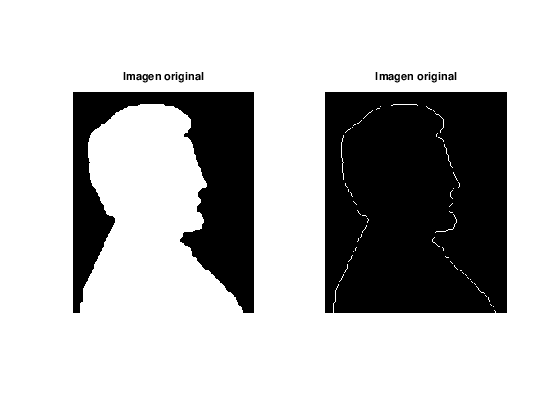

In [6]:
% Extracción de Bordes
pkg load image
A = imread('Images/imagen6.jpg');
A = im2double(A);
A = binaria(A);

subplot(1,2,1);
imshow(A);
title('Imagen original')

% Elemento estructurado
B = strel('diamond', 1);

%Borde interno A  - (A erode B)
C = imerode(A, B); % Erosión
D = A &~ C; % 

subplot(1,2,2);
imshow(D);
title('Borde interno')



### Rellenar huecos de una imagen
Sea $A$ una imagen binaria tal que tiene un hueco.

El método iterarivo para llenar los huecos de una imagen binaria $A$  es:
$$
X_k = (X_k \oplus B) \cap A^c
$$

donde $X_0$ es una matriz nula, excepto en una entrada y esa entrada debe pertenecer al hueco a llener.

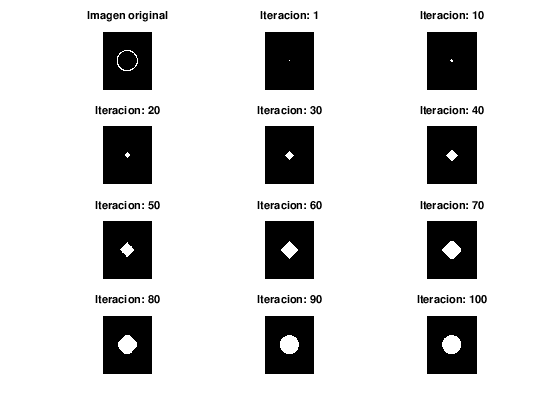

In [26]:
% Rellener huecos
pkg load image
A = imread('Images/imagen7.jpg');
A = im2double(A);
A = binaria(A);

subplot(4,3,1);
imshow(A);
title('Imagen original')

% Elemento estructurado
B = strel('diamond', 1);

% REllenar el hueco de la imagen
[m,n] = size(A);
X = zeros(m,n);
cx = floor(m/2); cy = floor(n/2);
X(cx, cy) = 1;

iter = 100;
cnt = 1;
for k = 1:iter
    C = imdilate(X, B);
    X = C&~A;
    if (mod(k,10) == 0 || k == 1)
        subplot(4,3,cnt+1);
        cnt = cnt+1;
        imshow(X)
        title(['Iteracion: ' num2str(k)])
    end
end

### Esqueleto de una figura
Sea $A$ una imagen binaria. Par obtener el esqueleto de una figura, se utiliza la siguiente operación:
$$
S(A)= \cap _{k = 0} ^{\bar k}S_k(A) = S_0(A)\cup S_1(A)\cup ... \cup S_k(A)
$$

donde: 
$$
\begin {matrix}
S_k(A) = (A\ominus kB) - (A\ominus kB) \odot B\\
A\ominus kB = (...((A\ominus B) \ominus B)\ominus B ... \ominus B)\\
\bar K = max\{k/(A\ominus KB) \not = \phi\}
\end{matrix}
$$

**Tarea:** *Implementar este método usando la imagen "imagen9.jpg"*

## Morfología en imágenes a escala de grises
Mucha operaciones morfológicas se desarrollan originalmente para imágenes binarias. A continuación veremos una extensión de estas operaciones para imágenes a escala de grises.

### ¿Qué necesitamos?
1. Imágen a escala de grises: A
1. Elemento estructurado

    Toman valores en {0,255}

**Para simplificar:** Consideraremos un elemento estructurado nulo, es decir $B(x,y) = 0, \forall x,y$. Además $B \in {\rm I\!R}^{3 \times 3}$, es decir, 
$$
B =
\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

$\color{red}{D_B}$ es el dominio donde se encuentra la entrada de B

1. **Dilatación:** La dilatación de $A$ usando EE $B$ se define como  $[A\oplus B](x,y) =\max \{ A(x+s, Y+t)/(s,t)\in D_B\}$

$$
\begin{matrix}
\begin{bmatrix}
\\
& 7 & 8 & 9 & 10 & \\
& 4 & 2^\color{red}* & 5 & 1\\
& 10 & 7 & 20 & 2\\
& 3 & 4 & 5 & 6
\end{bmatrix}&
\color{red}\oplus &
\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{bmatrix}&
\color{red}=&
\begin{bmatrix}
\\
\\
&&2^\color{red}*&&\\
\\
\\
\end{bmatrix}
\end{matrix}
$$

2. **Erosión:** La dilatación de $A$ usando EE $B$ se define como  $[A\ominus B](x,y) =\min \{ A(x+s, Y+t)/(s,t)\in D_B\}$

$$
\begin{matrix}
\begin{bmatrix}
\\
& 7 & 8 & 9 & 10 & \\
& 4 & 2^\color{red}* & 5 & 1\\
& 10 & 7 & 20 & 2\\
& 3 & 4 & 5 & 6
\end{bmatrix}&
\color{red}\ominus &
\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{bmatrix}&
\color{red}=&
\begin{bmatrix}
\\
\\
&&2^\color{red}*&&\\
\\
\\
\end{bmatrix}
\end{matrix}
$$

**Nota:** Los bordes se analizan de forma similar que el filtro de la mediana, es decir se selecciona el vecindario de los pixeles conexos, y se calcula el $\max($Dilatación$)$ y $\min($Erosión$)$

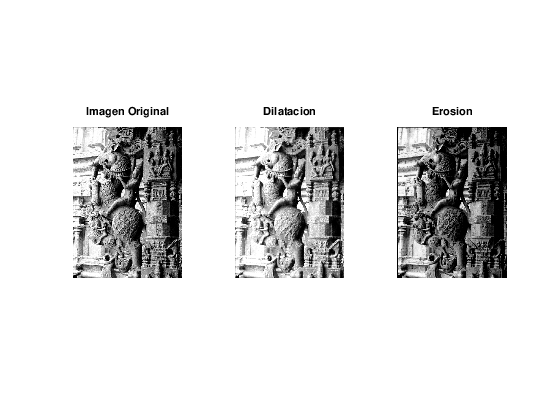

In [9]:
pkg load image

A = imread('Images/imagen11.jpg');
subplot(1,3,1)
imshow(A)
title('Imagen Original')

% El análisis de los bordes queda de tarea
% Dilatación
[m,n] = size(A);
C = uint8(zeros(m,n)); % imagen de salida
C(1,:) = A(1,:); C(m,:) = A(m,:);
C(:,1) = A(:,1); C(:,n) = A(:,n);

for x = 2:m-1
    for y = 2:n-1
        C(x,y) = max(max(A(x-1:x+1, y-1:y+1)));
    end
end

subplot(1,3,2)
imshow(C)
title('Dilatacion')

% Erosión
D = uint8(zeros(m,n)); % imagen de salida
D(1,:) = A(1,:); D(m,:) = A(m,:);
D(:,1) = A(:,1); D(:,n) = A(:,n);

for x = 2:m-1
    for y = 2:n-1
        D(x,y) = min(min(A(x-1:x+1, y-1:y+1)));
    end
end

subplot(1,3,3)
imshow(D)
title('Erosion')

De forma similar al caso de la imágenes binarias, se definen:
1. **Apertura:** $A\odot B = (A\ominus B) \oplus B$ 
1. **Clausura:** $A\odot B = (A\oplus B) \ominus B$

Para mejorar el contraste de una imagen a escala de grises, se puede utilizar las transformadas tipo  sombrero:
* Top-Hat $ =A - (A \ominus B)$
* Bottom-Hat $=(A\oplus B)-A$

Nota: La operación **-** es la resta de 2 matrices

In [12]:
% Dilatacion
function C = dilatacion_grises(A)
[m,n] = size(A);
C = uint8(zeros(m,n)); % imagen de salida
C(1,:) = A(1,:); C(m,:) = A(m,:);
C(:,1) = A(:,1); C(:,n) = A(:,n);

for x = 2:m-1
    for y = 2:n-1
        C(x,y) = max(max(A(x-1:x+1, y-1:y+1)));
    end
end
endfunction

% Erosion
function D = erosion_grises(A)
[m,n] = size(A);
D = uint8(zeros(m,n)); % imagen de salida
D(1,:) = A(1,:); D(m,:) = A(m,:);
D(:,1) = A(:,1); D(:,n) = A(:,n);

for x = 2:m-1
    for y = 2:n-1
        D(x,y) = min(min(A(x-1:x+1, y-1:y+1)));
    end
end
endfunction

% Apertura
function C = apertura_grises(A)
    C1 = erosion_grises(A);
    C =dilatacion_grises(C1);
endfunction

% Clausura
function C = clausura_grises(A)
    C1 = dilatacion_grises(A);
    C =erosion_grises(C1);
endfunction

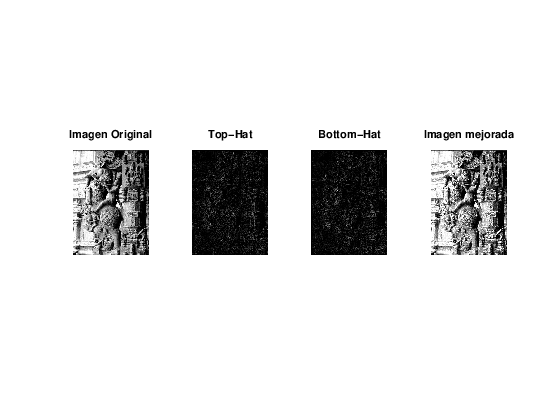

In [16]:
pkg load image

A = imread('Images/imagen11.jpg');
subplot(1,4,1)
imshow(A)
title('Imagen Original')

% Top_hat
C1 = apertura_grises(A);
C = A-C1;
subplot(1,4,2)
imshow(C)
title('Top-Hat')

% Bottom_hat
D1 = apertura_grises(A);
D = A-D1;
subplot(1,4,3)
imshow(D)
title('Bottom-Hat')

% Imagen mejorada
F = A+C;
subplot(1,4,4)
imshow(F)
title('Imagen mejorada')